In [1]:
import pandas as pd
import numpy as np
from typing import Union
import japanize_matplotlib
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

In [2]:
register_matplotlib_converters()
plt.rc('figure', figsize=(6, 3))
plt.rc('font', size=8)

# Data
(1) Perform an exploratory data analysis to highlight patterns in the data using whatever visualizations you prefer.

In [3]:
dfs = pd.read_csv('data/stores.csv', low_memory=False)
dft = pd.read_csv('data/transactions.csv', low_memory=False)
dfu = pd.read_csv('data/users.csv', low_memory=False)

In [4]:
dfs.shape, dft.shape, dfu.shape

((99991, 6), (1582260, 5), (9961, 3))

In [5]:
display(dfs.head(2))
display(dft.head(2))
display(dfu.head(2))

,id,nam,laa,category,lat,lon
0,139a9a4b-1cb4-cb91-f718-d0bdd7db31c9,Aichi Ken,Agui Cho,ショッピング,34.951439,136.935126
1,437e0dae-dbf7-b1a8-4a03-010b9597bbd2,Aichi Ken,Agui Cho,マッサージ,34.947078,136.884972


,id,user_id,store_id,event_occurrence,amount
0,a555eb55-1da4-6087-b5ab-06b35b608002,93098549-3ff0-e579-01c3-df9183278f64,a3c7874b-75df-9cf2-62ab-cf58be5d9e0e,2020-01-01 06:40:43.323987,315
1,f699b867-e70c-5160-90c8-7dfa32dce0da,35ba9da1-98d0-cbb7-7844-e648601b7208,1d59adf3-94f2-f5f8-46c6-8558c544a3a9,2020-01-01 07:04:25.968615,1646


,id,gender,age
0,3cf2d95c-851a-3e66-bd62-36050c1aa8dd,M,30.0
1,a85536f3-1bf8-fbeb-d06e-62e6dc5a2a83,M,55.0


In [6]:
# Check null values
def describe(df: pd.DataFrame) -> pd.DataFrame:
    dfd = pd.DataFrame({
        'null': df.isnull().sum(), 
        'unique': df.nunique(),
        'values': df.apply(lambda x: [x.value_counts().index[:3].tolist()]).iloc[0],
        'dtype': df.dtypes,
    }).T
    return dfd

display(describe(dfs))
display(describe(dft))
display(describe(dfu))

,id,nam,laa,category,lat,lon
null,0,0,0,0,0,0
unique,99991,47,1676,17,99991,99991
values,"[139a9a4b-1cb4-cb91-f718-d0bdd7db31c9, 754728a...","[Tokyo To, Kanagawa Ken, Osaka Fu]","[Yokohama Shi, Osaka Shi, Nagoya Shi]","[その他, ショッピング, グルメ]","[34.95143949496629, 34.5847705729808, 34.55415...","[136.9351257981604, 135.67367646411674, 135.65..."
dtype,object,object,object,object,float64,float64


,id,user_id,store_id,event_occurrence,amount
null,0,0,0,0,0
unique,1582260,9542,95460,1582259,25888
values,"[a555eb55-1da4-6087-b5ab-06b35b608002, a64ee38...","[ffbdfd47-dc79-72f0-1338-94b3854ca896, d5249dc...","[205a9fb1-7000-006a-853d-e97b7bdf8499, 2337fa5...","[2021-03-08 10:59:53.518682, 2021-07-22 11:30:...","[194, 236, 200]"
dtype,object,object,object,object,int64


,id,gender,age
null,0,996,498
unique,9961,3,76
values,"[3cf2d95c-851a-3e66-bd62-36050c1aa8dd, 610097f...","[M, F, OTHER]","[33.0, 29.0, 35.0]"
dtype,object,object,float64


In [7]:
# Merge data
dfu['age_cate'] = pd.cut(dfu.age, bins=[-1, 20, 40, 65, np.inf], labels=[20, 40, 65, 100])

dfd = (
    dft
    .assign(
        month = lambda x: pd.to_datetime(x.event_occurrence).dt.to_period('M'),
        date = lambda x: pd.to_datetime(x.event_occurrence).dt.to_period('D'),
    )
    .drop(columns=['id', 'event_occurrence'])
    .merge(
        dfs.rename(columns={'id': 'store_id'}),
        on='store_id',
        how='left'
    )
    .merge(
        dfu.rename(columns={'id': 'user_id'}),
        on='user_id',
        how='left'
    )
)

In [8]:
dfd.head(3).T

,0,1,2
user_id,93098549-3ff0-e579-01c3-df9183278f64,35ba9da1-98d0-cbb7-7844-e648601b7208,63cb5ee0-a457-9975-5455-4d76109bc754
store_id,a3c7874b-75df-9cf2-62ab-cf58be5d9e0e,1d59adf3-94f2-f5f8-46c6-8558c544a3a9,c835f09d-ac5b-2005-1959-f452456a746a
amount,315,1646,385
month,2020-01,2020-01,2020-01
date,2020-01-01,2020-01-01,2020-01-01
nam,Saitama Ken,Gunma Ken,Hiroshima Ken
laa,Soka Shi,Meiwa Cho,Fukuyama Shi
category,コンビニ,ショッピング,コンビニ
lat,35.830649,36.216801,34.64226
lon,139.809781,139.562541,133.257595


## Value Counts

In [9]:
# User
for col in ['age_cate', 'gender']:
    df = dfu[col].value_counts().to_frame('count')
    display(df[:5])

,count
65,3255
100,3046
40,2558
20,604


,count
M,5352
F,3596
OTHER,17


In [10]:
# Store
for col in ['category', 'nam', 'laa']:
    df = dfs[col].value_counts().to_frame('count')
    display(df[:5])

,count
その他,25860
ショッピング,18111
グルメ,14096
カフェ,11873
美容院・サロン,8987


,count
Tokyo To,10273
Kanagawa Ken,7083
Osaka Fu,6913
Aichi Ken,5824
Saitama Ken,5677


,count
Yokohama Shi,2892
Osaka Shi,2077
Nagoya Shi,1756
Sapporo Shi,1503
Kobe Shi,1210


## GMV

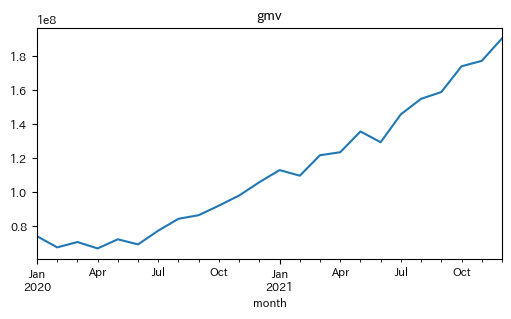

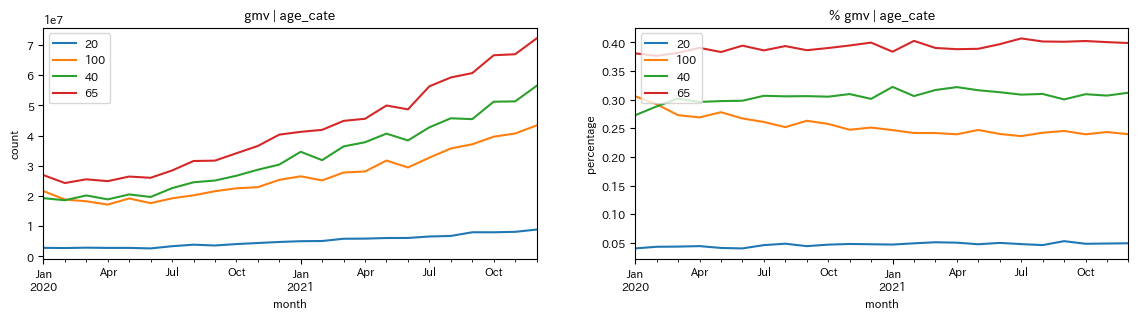

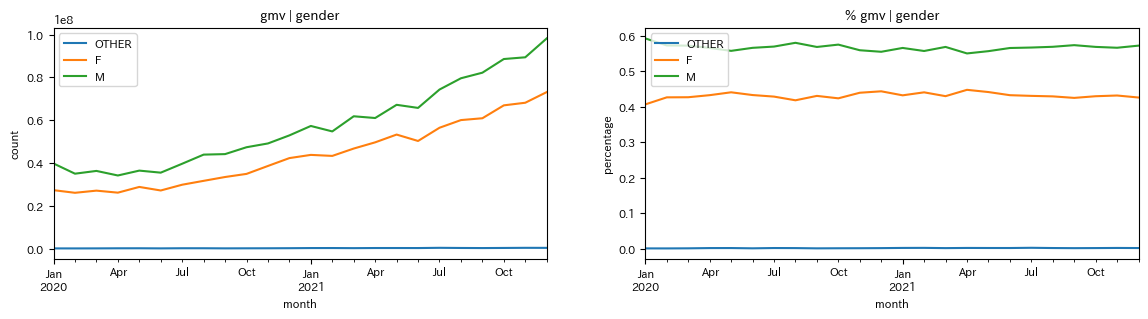

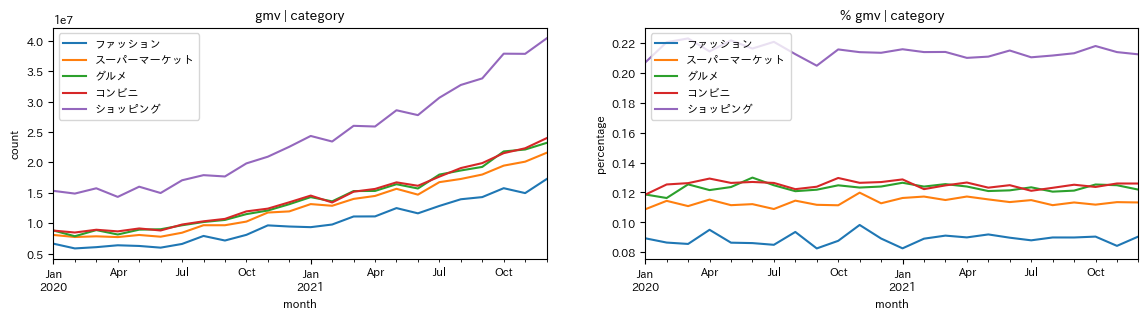

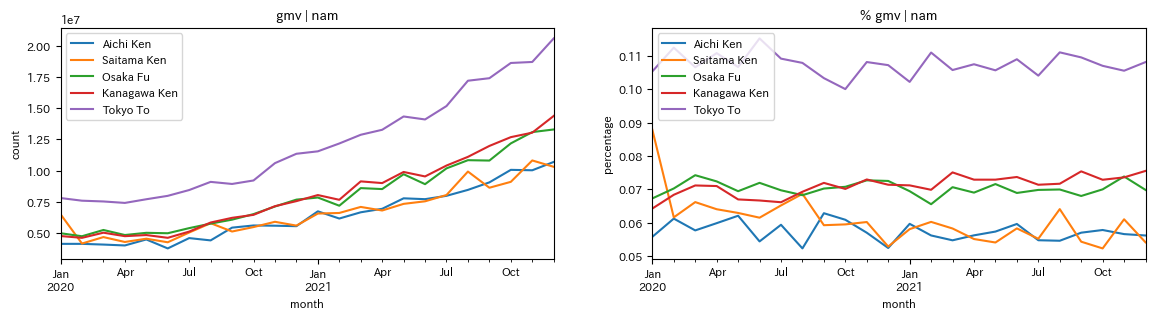

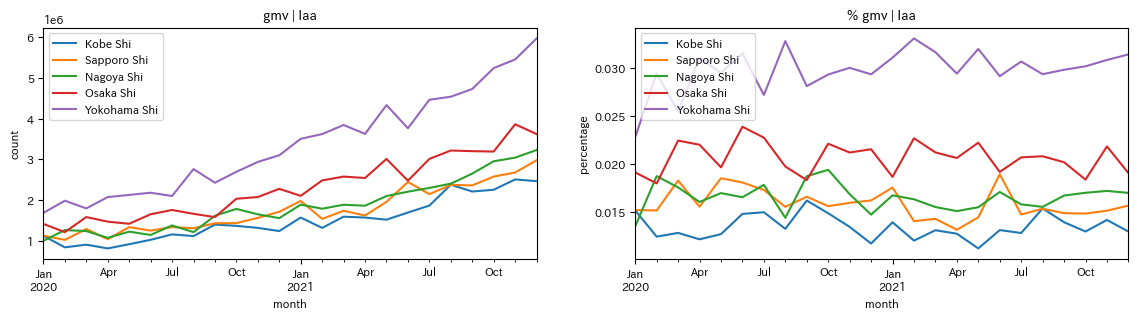

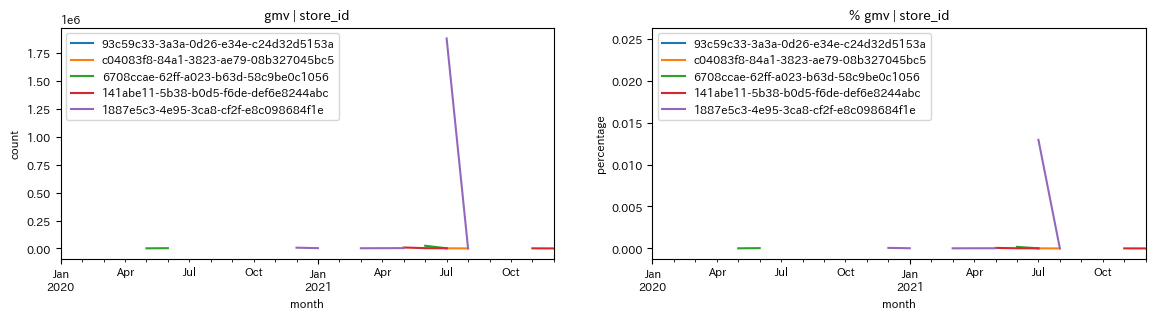

In [11]:
# Calculate monthly GMV
def make_ts(dfd: pd.DataFrame, cols: Union[list, str] = None, 
            time_col: str = 'month', normalize: bool = False) -> Union[pd.Series, pd.DataFrame]:
    if isinstance(cols, str):
        cols = [cols]
    
    subset = [time_col] + cols if cols else [time_col]
    ts = dfd.groupby(subset)['amount'].sum()

    if cols:
        ts = ts.unstack(0).T
    else:
        ts.name = 'amount'
    
    if normalize:
        if isinstance(ts, pd.Series):
            ts = ts/ts.sum()
        else:
            ts = ts.div(ts.sum(axis=1), axis=0)
    
    return ts

ts = make_ts(dfd)
ts.plot(title='gmv')

for col in ['age_cate', 'gender', 'category', 'nam', 'laa', 'store_id']:
    ts = make_ts(dfd, [col])
    ts_norm = make_ts(dfd, [col], normalize=True)
    
    top_cols = ts.sum().sort_values()[-5:].index
    
    ts = ts[top_cols]
    ts_norm = ts_norm[top_cols]
    
    fig, axes = plt.subplots(ncols=2, figsize=(14, 3))
    ts.plot(title=f'gmv | {col}', ax=axes[0], ylabel='count')
    ts_norm.plot(title=f'% gmv | {col}', ax=axes[1], ylabel='percentage')
    axes[0].legend(loc=2)
    axes[1].legend(loc=2)

# Conclusions
GMV is increasing linearly.

Cohorts with most revenue:
- age 40~65
- male
- shopping category
- Tokyo-to
- Yokohama-shi

Stores with most revenue have many missing months.